<a href="https://colab.research.google.com/github/Mariam-Nazlawy/Image-Compression/blob/main/Gray_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Important Libraries

In [ ]:
import numpy as np
from numpy.linalg import eigh
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.datasets.mnist import load_data

## Load the mnist dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data()

## Choose Image and visualize it

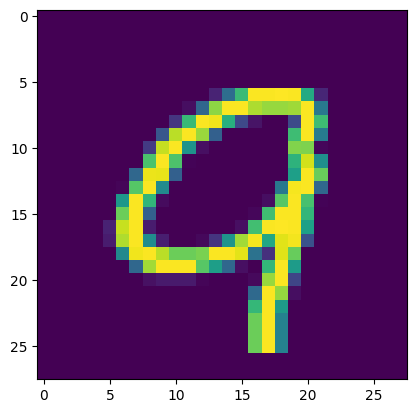

In [ ]:
img = x_train[3000]
plt.imshow(img)
plt.show()

Normalizion

In [ ]:
def Image_Preprocessing(img):
  # normalization
  normalized_img = img / 255.0
  return normalized_img

## PCA Algorithm Implementation

In [ ]:
class PCA:
  def __init__(self, num_of_componants, selected_eigenvectors = np.ndarray([])):
    self.num_of_componants = num_of_componants


# Calculate the covariance matrix
  def calc_covariance(self, preprocessed_img):
    covariance_matrix = np.cov(preprocessed_img)
    return covariance_matrix

# Calculate eigenvalues and eigenvectors
  def calc_eigenvalues_eigenvectors(self, covariance_matrix):
    eigenvalues, eigenvectors = eigh(covariance_matrix)
    selected_eigenvectors = self.select_eigenvectors(eigenvalues, eigenvectors)
    return selected_eigenvectors

# Select eigenvectors with highest covariance
  def select_eigenvectors(self, eigenvalues, eigenvectors):

    # Sort eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # select from the beginning till num of componants
    selected_eigenvalues = eigenvalues[:self.num_of_componants]
    selected_eigenvectors = eigenvectors[:, :self.num_of_componants]

    self.selected_eigenvectors = selected_eigenvectors

    return selected_eigenvectors

  def compress(self, preprocessed_img):
    covariance_matrix = self.calc_covariance(preprocessed_img)
    selected_eigenvectors = self.calc_eigenvalues_eigenvectors(covariance_matrix)
    compressed_img = np.dot(preprocessed_img, selected_eigenvectors)
    return compressed_img

  # Reconstruct the compressed image
  def reconstruct(self, compressed_img, preprocessed_img):
    reconstructed_img = np.dot(compressed_img, self.selected_eigenvectors.T)

    # Reshape the reconstructed image back to its original shape
    reconstructed_img = reconstructed_img.reshape(preprocessed_img.shape)

    return reconstructed_img

  def visualise_compressed_img(self, compressed_img):
    # Visualize the original and compressed image
    plt.figure(figsize=(8, 4))
    plt.imshow(compressed_img.reshape(28,28))
    plt.title('compressed Image')
    plt.axis('off')
    plt.show()

  def visualise_decompressed_img(self, reconstructed_img):
    # Visualize the decompressed image
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_img.reshape(28,28))
    plt.title('Decompressed Image')
    plt.axis('off')
    plt.show()


## Normalize the image

In [ ]:
preprocessed_img = Image_Preprocessing(img)
preprocessed_img.shape

(28, 28)

## Choose number of components and compress the image

In [ ]:
pca = PCA(num_of_componants= 100)
compressed_img = pca.compress(preprocessed_img)


## Reconstruct/Decompress the image

In [ ]:
reconstructed_img = pca.reconstruct(compressed_img, preprocessed_img)


## Visualize the Compressed Image

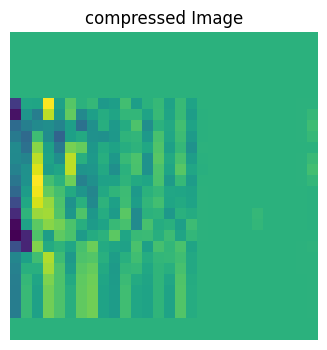

In [ ]:
pca.visualise_compressed_img(compressed_img)


## Visualize the Reconstructed/Recompressed Image

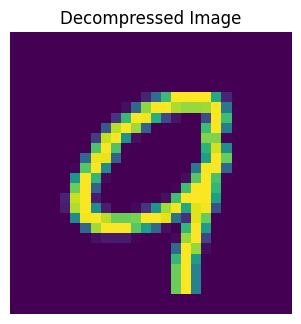

In [ ]:
pca.visualise_decompressed_img(reconstructed_img)
